<Figure size 432x288 with 0 Axes>

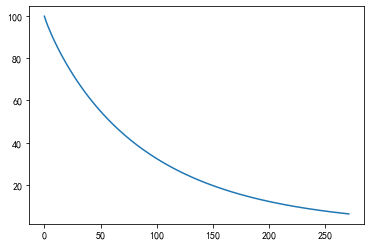

<Figure size 432x288 with 0 Axes>

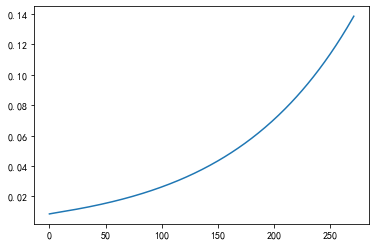

<Figure size 432x288 with 0 Axes>

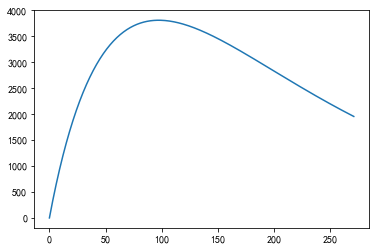

In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
l=850
w=2
k=256/1.6
C=k*l*w/1000
v0=100/3.6
a=20/1.609344*l*w/1000
va = 76/3.6
b = 140/1.609344*l*w/1000
vb = 20/3.6
x=range(int(C))
gamma = math.log(math.log(va / v0) / math.log(vb / v0)) / math.log(a / b)
beta = a / (math.log(v0 / va) ** (1 / gamma))
def vx(x):
    return v0*3.6*math.exp(-(x/beta)**gamma)

def mu(x):
    return x*vx(x)*1000/l

def rx(x):
    return vx(x)*1000/l

plt.figure(0)
plt.plot(x,[vx(i) for i in x])
plt.show()
plt.figure(1)
plt.plot(x,[1/rx(i) for i in x])
plt.show()
plt.figure(2)
plt.plot(x,[mu(i) for i in x])
plt.show()
delta=1


In [2]:
def P0(x):
    c1, c2, c3, c4, c5, c6, c7 = 5.7795, 1.0571, 0, 1.0283, 0.4131, 17.5198, 0.9231
    return math.exp(-(c1*(l/1000)**c2+c3)*(c4*((vb*3.6)**c5)+c6)*((x/C)**c7))
def PB(x):
    d1,d2,d3,d4,d5,d6,d7=95.0111,0.8821,1.5804,0.1604,0.2787,0,0.7976
    return math.exp(-(d1*(l/1000)**d2+d3)*(d4*((vb*3.6)**d5)+d6)*(1-(x/C))**d7)

def gaussian(t, a1, b1, c1, a2, b2, c2, a3, b3, c3, a4, b4, c4, a5, b5, c5, a6, b6, c6):
    return a1*np.exp(-((t/3600-b1)/c1)**2) + a2*np.exp(-((t/3600-b2)/c2)**2) + \
           a3*np.exp(-((t/3600-b3)/c3)**2) + a4*np.exp(-((t/3600-b4)/c4)**2) + \
           a5*np.exp(-((t/3600-b5)/c5)**2) + a6*np.exp(-((t/3600-b6)/c6)**2)

def lambda_(t,times=1):
    return times*gaussian(t, 7.21e+05,7.733,9.306,-7.205e+05, 7.724,9.296,1038, 10.03,1.386,665,17.83,0.8317,327.4,15.71,1.646,3495,8.132,1.092)/3600

def plot_lambda():
    xs=np.linspace(0,24,86400)
    y=[]
    x=range(24)
    plt.figure(figsize=[10,4],dpi=200)
    for i in xs:
        y.append(gaussian(i*3600, 7.21e+05,7.733,9.306,-7.205e+05, 7.724,9.296,1038, 10.03,1.386,665,17.83,0.8317,327.4,15.71,1.646,3495,8.132,1.092))
    data=[209,161,116,94,83,152,337,1516,4035,3085,2032,1605,1278,1229,1451,1599,1640,1670,1828,1115,819,884,613,342]
    plt.scatter(x, data,marker='x',color='blue',label='the actual data')
    plt.plot(xs, y,color='red',label='6 order Gaussian')
    plt.xlim(0,24)
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
    plt.yticks([500,1000,1500,2000,2500,3000,3500,4000])
    plt.legend()
    plt.show()


def x_dict(n=86399,delta=1):
    x = dict()
    x[0]=0
    t=0
    while t < int(n*delta):
        x[(t+1)*delta]=max(0,x[t*delta]-x[t*delta]*v0*math.exp(-(x[t*delta]/beta)**gamma)/l*(1-P0(x[t*delta]))*delta+(lambda_(t*delta)+lambda_((t+1)*delta))/2*(1-PB(x[t*delta]))*delta)
        if x[(t+1)*delta]>C:
            x[(t+1)*delta]=C
        t+=delta
    return x
x=x_dict()

mu_h=C/l*v0*math.exp(-(C/beta)**gamma)

def PF0(xF):
    alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7 = 5.5917, 1.0096, 0, 0.8739, 0.2574, 18.2688, 0.9247
    return math.exp(-(alpha1*((l/1000)**alpha2)+alpha3)*(alpha4*(vb**alpha5)+alpha6)*(xF/C)**alpha7)
def PFB(xF):
    yita1, yita2, yita3, yita4, yita5, yita6, yita7 = 0.1613, 1.2156, 0.8592, 0.1242, 0.2349, 0.0040, 1.1300
    return yita1*PF0(xF)**yita2+yita3*(xF/C)**yita4-yita5*PF0(xF)**(-yita6)*(xF/C)**yita7



def xF_dict(n=86399,delta=1):
    xF = dict()
    xF[0]=0
    t=0
    for t in range(int(n*delta)):
        xF[(t+1)*delta]=max(0,xF[t*delta]-xF[t*delta]/l*v0*math.exp(-(xF[t*delta]/beta)**gamma)*(1-PF0(xF[t*delta]))*delta+(lambda_(t*delta)+lambda_((t+1)*delta))/2*(1-PB(x[t*delta]))*delta+ \
               min((lambda_(t*delta)+lambda_((t+1)*delta))/2*PB(x[t*delta]),mu_h*(1-PFB(xF[t*delta])))*delta)
        if xF[(t+1)*delta]>C:
            xF[(t+1)*delta]=C
        t+=delta
    return xF
xF=xF_dict()

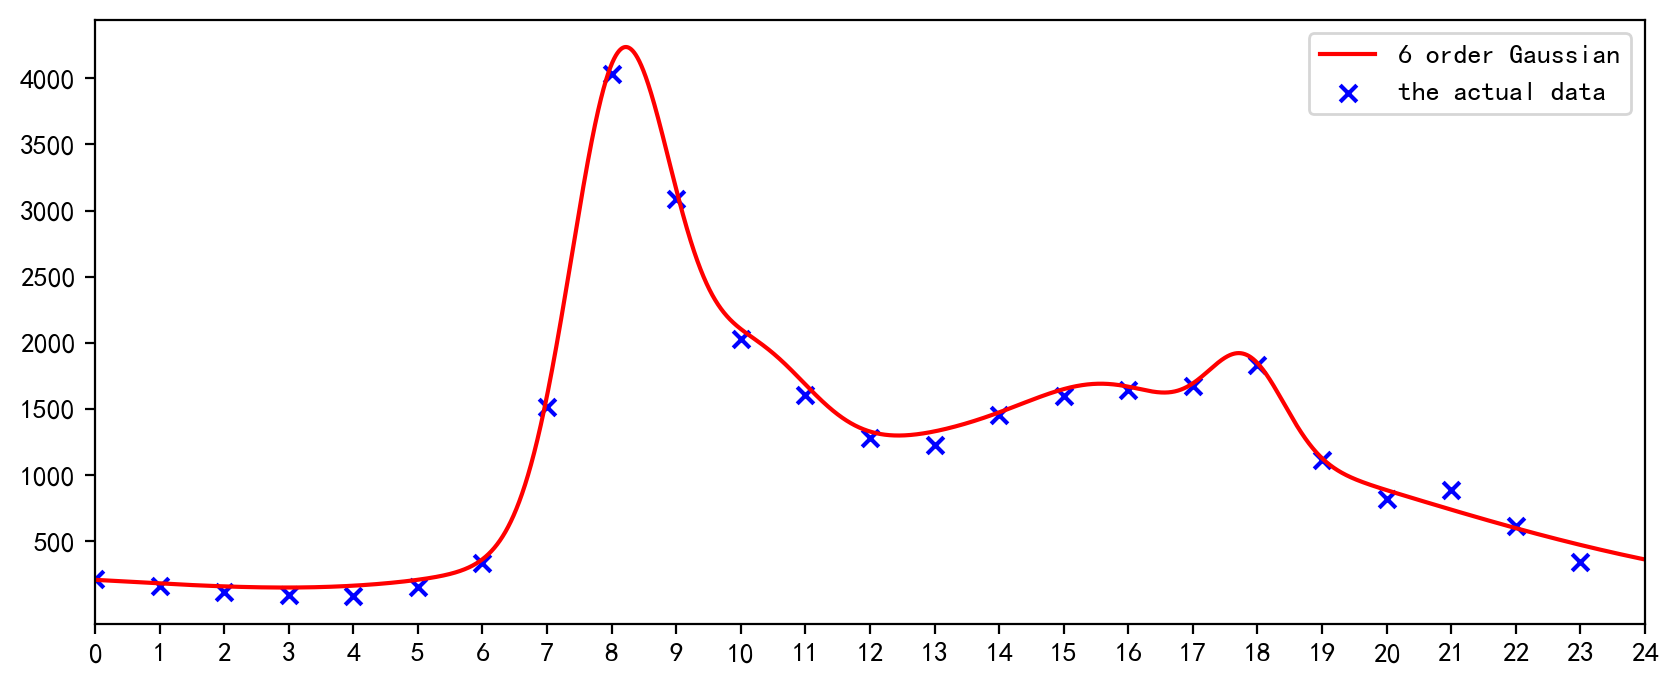

In [3]:
plot_lambda()

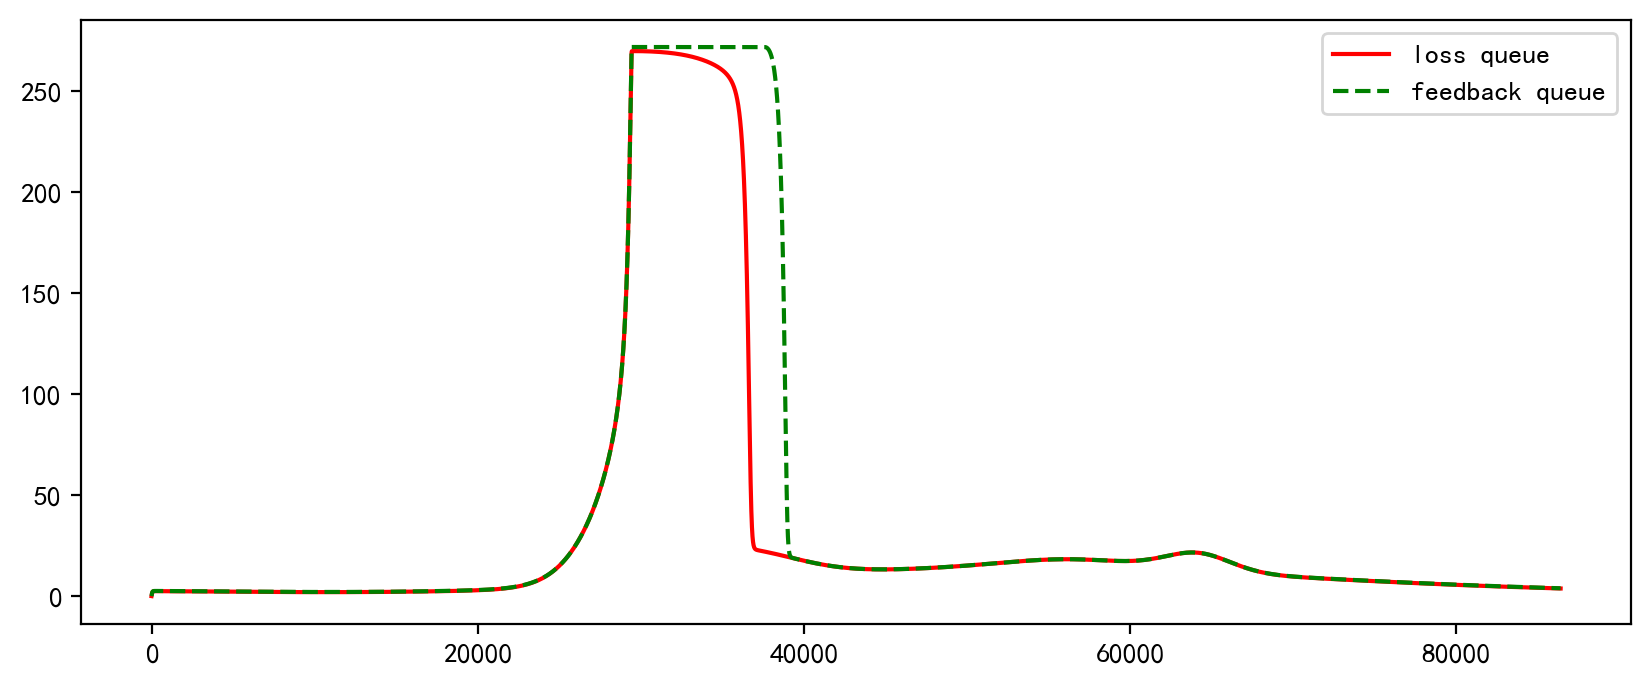

In [4]:
def plot_lossfeedback():
    plt.figure(figsize=[10,4],dpi=200)
    plt.plot(range(86400),x.values(),c='r',label='loss queue')
    plt.plot(range(86400),xF.values(),c='g',linestyle='--',label='feedback queue')
    plt.legend()
    plt.show()
plot_lossfeedback()